# The Data investigation

In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from  <a href="https://fivethirtyeight.com/" target = "_blank">FiveThirtyEight</a>. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

To begin, we need to take a look at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. After looking through some of the questions asked, take a look at FiveThirtyEight's article <a href="https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/" target = "_blank">What Do Men Think It Means To Be A Man?</a> to see their major takeaways. We're going to try to find more insights using machine learning.

First, let's start getting a sense of how this data is structured and try to answer these questions using your Pandas:

* What are the names of the columns? How do those columns relate to the questions in the PDF?
* How many rows are there?
* How is a question with multiple parts, like question 7, represented in the DataFrame?
* How many people said they often ask a friend for professional advice? This is the first sub-question in question 7.




In [38]:
survey = pd.read_csv("masculinity.csv")
print(survey.columns)
print(len(survey))
print(survey["q0007_0001"].value_counts())
print(survey.head())

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

# Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. Let's once again consider question 7. We can't cluster the data using the strings like  `"Often"` or `"Rarely"`, but we can turn those phrases into numbers. Therefore, we will map the data in the following way: 

* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.




In [39]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


# Plotting the Data

We now have 11 different features that we could use in our KMeans algorithm. Before we jump into clustering, let's graph some of these features on a 2D graph. Let's plot `survey["q0007_0001"]` and `survey["q0007_0002"]`. 




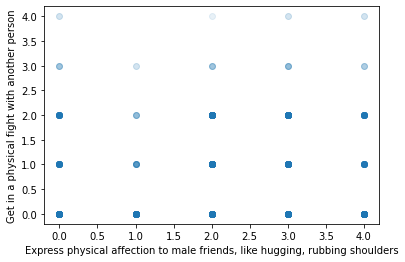

In [40]:
from matplotlib import pyplot as plt
plt.scatter(survey["q0007_0003"], survey["q0007_0005"], alpha = 0.1)
plt.xlabel('Express physical affection to male friends, like hugging, rubbing shoulders')
plt.ylabel('Get in a physical fight with another person')
plt.show()

We can see that the more a person is likely to Express physical affection to male friends, like hugging, rubbing shoulders, then the less he/she is likely to Get in a physical fight with another person. We could do compare other features in the same way, but I'll stop here for now. 

# Building the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 

Take a look at the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

We need to first drop all of the rows that contain a `NaN` value in any of the columns we're interested in. 

In [17]:
from sklearn.cluster import KMeans
rows_to_cluster = survey.dropna(subset =["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"])
classifier = KMeans(n_clusters = 2 )
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"]])
print(classifier.cluster_centers_)

[[1.87830688 1.84391534 0.85185185 1.72486772 0.57142857 2.64021164
  1.97089947]
 [2.84548105 2.81632653 2.84110787 2.39941691 0.69387755 3.06997085
  2.90087464]]


# Separating the Cluster Members

When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluser and a masculine cluseter, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

We might be able to find out more information about these clusters by looking at the specific members of each cluster. Print `classifier.labels_`. This list shows which cluster every row in the DataFrame corresponds to.

For example,  if `classifier.labels_` was `[1, 0 ,1]`, then the first row in the DataFrame would be in cluster one, the second row would be in cluster 0, and the third row would be in cluster one. A row represents one persons answers to every question in the survey.



In [41]:
classifier.labels_
cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] ==1:
        cluster_one_indices.append(i)
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
print(cluster_zero_indices)
        

[1, 4, 6, 7, 9, 10, 12, 14, 17, 18, 19, 24, 29, 35, 39, 42, 49, 51, 52, 53, 54, 55, 57, 58, 62, 63, 65, 66, 75, 78, 79, 82, 84, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 101, 106, 107, 109, 113, 116, 117, 118, 119, 123, 128, 129, 130, 131, 132, 134, 139, 142, 143, 154, 172, 175, 176, 178, 179, 180, 181, 184, 187, 189, 195, 196, 198, 199, 201, 209, 212, 222, 229, 230, 231, 233, 236, 237, 240, 241, 247, 248, 249, 250, 256, 260, 261, 263, 264, 272, 275, 281, 283, 284, 286, 288, 291, 296, 297, 299, 300, 301, 305, 310, 311, 325, 328, 331, 336, 337, 340, 341, 343, 347, 350, 351, 353, 361, 367, 369, 377, 378, 390, 391, 392, 393, 394, 396, 397, 398, 399, 409, 410, 411, 412, 415, 417, 418, 419, 425, 428, 429, 432, 449, 454, 455, 457, 459, 461, 463, 468, 470, 471, 476, 477, 478, 484, 489, 490, 493, 494, 496, 498, 499, 502, 508, 509, 510, 515, 516, 521, 523, 525, 526, 529, 531, 533, 542, 546, 549, 555, 556, 559, 560, 562, 563, 564, 566, 567, 570, 577, 579, 580, 585, 588, 589, 592, 593, 599, 603, 61

# Investigating the Cluster Members

Now that we have the indices for each cluster, let's look at some stats about these two clusters. We can get the rows of the DataFrame that correspond to cluster zero.

Finally, let's look at some information about these two clusters. By printing the `value_counts()` of the `educ4` column of each cluster we can find how the education level changes in our clusters.

If we divide the result of `value_counts()` by the size of the cluster, we get the percentage of people in each category rather than the total number. This will make it easier to compare the two clusters.

In [42]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print((cluster_one_df['educ4'].value_counts())/len(cluster_one_df))

Some college            0.314815
College or more         0.285714
Post graduate degree    0.251323
High school or less     0.145503
Name: educ4, dtype: float64
Post graduate degree    0.365889
College or more         0.330904
Some college            0.230321
High school or less     0.072886
Name: educ4, dtype: float64


# Comparing other features

Now that we've found out that by answering those 7 questions people don't fall into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education!

Now instead of 'edication' I want to see how the clusters change if we divide them based on their answers in 'orientation' column and 'how masculine or “manly” do you feel' column.  



In [37]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
print(cluster_zero_df['orientation'].value_counts()/len(cluster_zero_df))
print((cluster_one_df['orientation'].value_counts())/len(cluster_zero_df))

Straight        0.912698
Gay/Bisexual    0.071429
Other           0.013228
Name: orientation, dtype: float64
Straight        1.521164
Gay/Bisexual    0.238095
Other           0.042328
No answer       0.013228
Name: orientation, dtype: float64


In [43]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]
masc1 = (cluster_one_df['q0001'].value_counts())/len(cluster_zero_df)
masc0 = (cluster_zero_df['q0001'].value_counts()/len(cluster_zero_df))
print(cluster_zero_df['q0001'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['q0001'].value_counts()/len(cluster_zero_df))

Somewhat masculine      0.515873
Very masculine          0.341270
Not very masculine      0.105820
Not at all masculine    0.021164
No answer               0.015873
Name: q0001, dtype: float64
Somewhat masculine      0.960317
Very masculine          0.708995
Not very masculine      0.119048
Not at all masculine    0.021164
No answer               0.005291
Name: q0001, dtype: float64


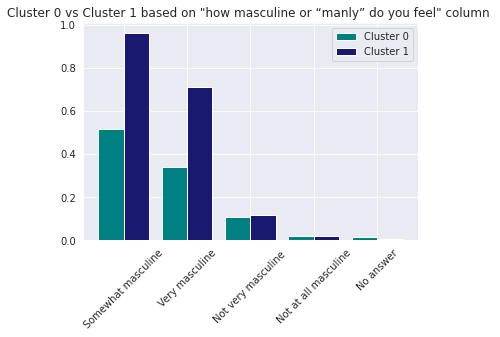

In [62]:
import seaborn as sns
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 
labels = ['Somewhat masculine', 'Very masculine', 'Not very masculine ' , 'Not at all masculine', 'No answer']

ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, masc0, color = '#008080' )
ax.set_xticks(range(len(masc0)))
#ax.set_xticklabels(masc0)
plt.bar(x_values2, masc1, color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(labels, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('Cluster 0 vs Cluster 1 based on "how masculine or “manly” do you feel" column ')
plt.show()